In [165]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
iris=sb.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

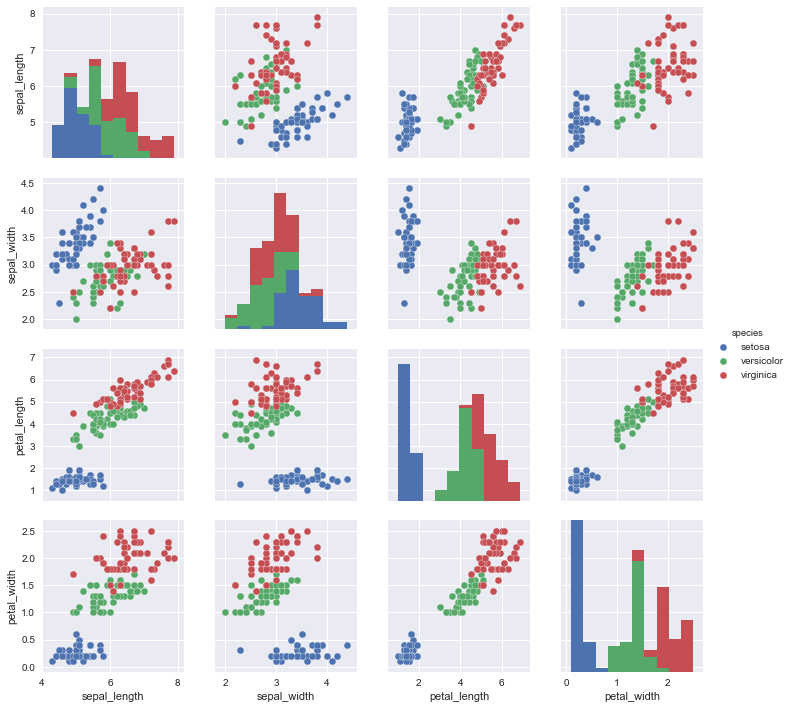

In [8]:
sb.pairplot(iris,hue='species')
# blue color-setosa los seperatable from the other 2

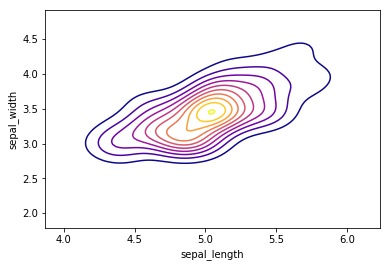

In [3]:
setosa=iris[iris['species']=='setosa']
sb.kdeplot(setosa['sepal_length'], setosa['sepal_width'],cmap='plasma')

In [166]:
X=iris.drop('species', axis=1)
y=iris['species']

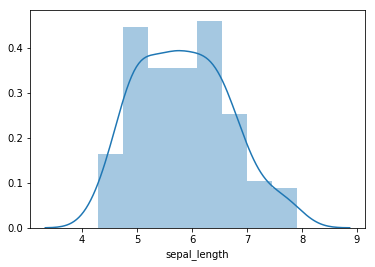

In [143]:
sns.distplot(X['sepal_length'])

In [120]:
# train the data

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)

In [168]:
# fit the data in \the model

In [169]:
from sklearn.svm import SVC
svc_m=SVC()
svc_m.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [170]:
pred_svc=svc_m.predict(X_test)

In [171]:
# evaluate the model

In [172]:
from sklearn.metrics import classification_report as cr, confusion_matrix as cm

In [173]:
print(cm(y_test, pred_svc))
print('\n')
print(cr(y_test, pred_svc))
# only mnislabel 1 of them

[[15  0  0]
 [ 0 18  1]
 [ 0  0 11]]


             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       1.00      0.95      0.97        19
  virginica       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45



In [ ]:
# tune the parameters to try to get even better

In [ ]:
 #SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
 # decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
 # max_iter=-1, probability=False, random_state=None, shrinking=True,
 # tol=0.001, verbose=False)

# C controls the cost of misclassfication of the training data
# a large c gives low bias and high variance, the low bias is due to panalyzing the cost misclassfication
# small c is the opposite

# gamma : small gamma means a gaussian for large variance
# larhe gamma leads to high bias and low variance. (if gamma is large and variance is small imply Support vector 
# dfoes not have a widespreed variance)

In [181]:
from sklearn.model_selection import GridSearchCV

In [182]:
param_grid={'C': [0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001]} # a dictionary 

In [183]:
grid=GridSearchCV(SVC(), param_grid, verbose=2)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [184]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [185]:
grid.best_params_

{'C': 100, 'gamma': 0.01}

In [186]:
grid_prediction=grid.predict(X_test)

In [187]:
print(cm(y_test, grid_prediction))
print('\n')
print(cr(y_test, grid_prediction))

[[15  0  0]
 [ 0 17  2]
 [ 0  0 11]]


             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       1.00      0.89      0.94        19
  virginica       0.85      1.00      0.92        11

avg / total       0.96      0.96      0.96        45

